**Part 1: Introduction

The data that will be used for this assignment is reporting data for vaccine adverse events.
"The Vaccine Adverse Event Reporting System (VAERS) is a national early warning system to detect possible safety problems in U.S. licensed vaccines.VAERS is co-managed by the Centers for Disease Control and Prevention (CDC) and the U.S. Food and Drug Administration (FDA. VAERS accepts and analyzes reports of adverse events (possible side effects) following vaccination." 

source: https://vaers.hhs.gov/faq.html italicized text

As most of the world has been questioning and having concerns with regard to the safety of COVID19 vaccines. This research project aims to determine the current risks in recieving the vaccine that have been reported since it's release. The way we will measure risks is by quantitative measures such as:

**The number of deaths after recieving the COVID19 vaccines

**The number of hospitilizations after recieving the COVID19 vaccines


We will use the Bloomberg ( originally from CDC database) as the source for the total number of vaccines administered in the US = 87.9 million

source:https://www.bloomberg.com/graphics/covid-vaccine-tracker-global-distribution/

**Part 2: Data Summary

The data was originally acquired from the site: https://vaers.hhs.gov
It was exported and filtered for vaccines that are only covid19 related Then it was uploaded to the Github repository mazal-tov/Project2 There are two sets of data one that has the use cases and the other that is reference data regarding symptoms experiences after recieving the vaccine.

**How many use cases your data set provides?

There are 20,568 adverse events (rows/use cases) in our dataset. There are 14,343 symptoms reference record types for our data. (this has not been excluded for the COVID19 vaccine)

**How many attributes are in each use case?

There are 36 attributes in the events dataset and an additonal 10 attributes in the reference symptoms table.The VAERS_ID appears in both datasets

**What the data types are for each of the attributes?

There are four types of data attrbiutes:
-Demical
-Int
-Vachar
-Date

**Part 3: Data Management using PostgreSQL 

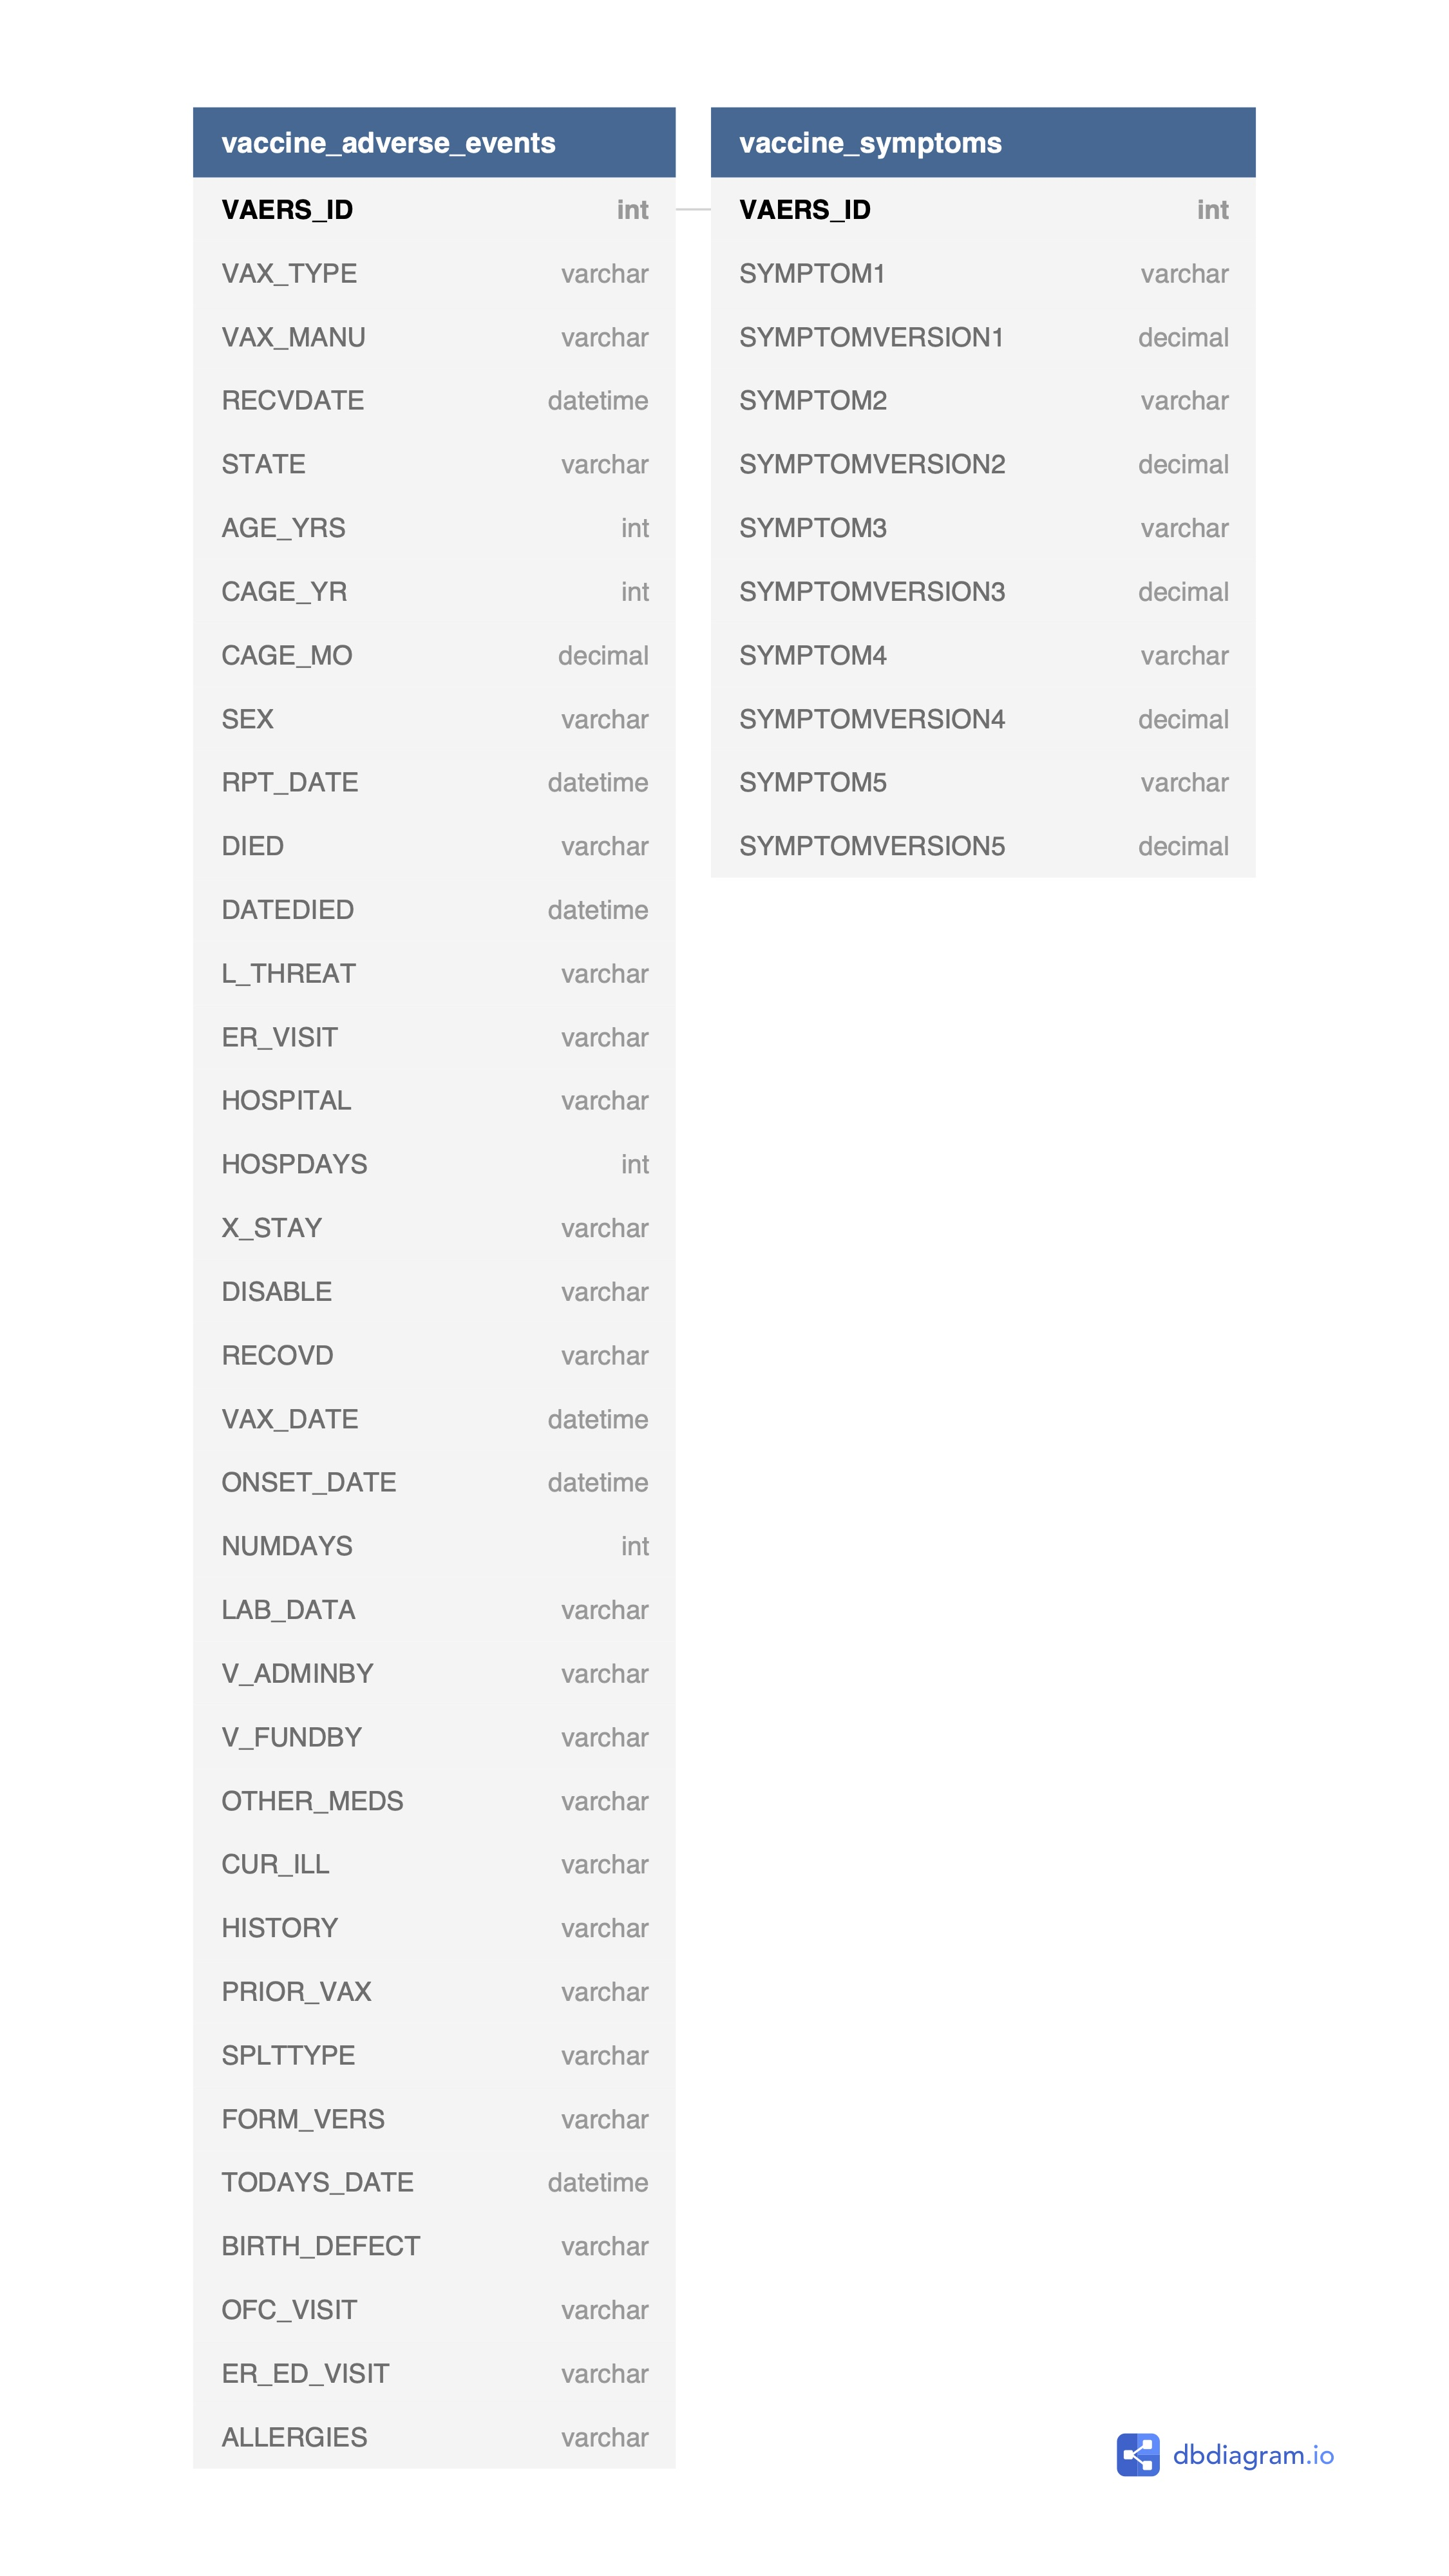

In [ ]:
#Part 3: Data Management using PostgreSQL 
# We created the database and will send over the database creation code sql script

#import the pandas library and also numpy 
import pandas as pd
import numpy as np

#read the data file from GitHub and convert to a NumPy ndarray object
#be sure to replace the ‘link_to_raw_copy of data file in your Github Repository’ 
#placeholder shown below # with a link to the “raw” version of the file you pushed 
#to your online GitHub repository

#create an array from the csv file in the github location
vaccine_adverse = pd.read_csv("https://raw.githubusercontent.com/mazal-tov/Project2/main/2021_2020VAERSDATA.csv") 
df1 = pd.DataFrame(vaccine_adverse)
df1




In [2]:
#Read the dataframe for symptoms so we can comment on the values for Part #2

symptoms = pd.read_csv("https://raw.githubusercontent.com/mazal-tov/Project2/main/2021VAERSSYMPTOMS.csv") 
df2 = pd.DataFrame(symptoms)
df2

,VAERS_ID,SYMPTOM1,SYMPTOMVERSION1,SYMPTOM2,SYMPTOMVERSION2,SYMPTOM3,SYMPTOMVERSION3,SYMPTOM4,SYMPTOMVERSION4,SYMPTOM5,SYMPTOMVERSION5
0,916600,Dysphagia,23.1,Epiglottitis,23.1,NaN,NaN,NaN,NaN,NaN,NaN
1,916601,Anxiety,23.1,Dyspnoea,23.1,NaN,NaN,NaN,NaN,NaN,NaN
2,916602,Chest discomfort,23.1,Dysphagia,23.1,Pain in extremity,23.1,Visual impairment,23.1,NaN,NaN
3,916603,Dizziness,23.1,Fatigue,23.1,Mobility decreased,23.1,NaN,NaN,NaN,NaN
4,916604,Injection site erythema,23.1,Injection site pruritus,23.1,Injection site swelling,23.1,Injection site warmth,23.1,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
14338,1040170,Cardiac arrest,23.1,Cyanosis,23.1,Endotracheal intubation,23.1,Erythema,23.1,Pain,23.1
14339,1040170,Peripheral coldness,23.1,Pyrexia,23.1,Respiration abnormal,23.1,Resuscitation,23.1,Troponin increased,23.1
14340,1040170,White blood cell count increased,23.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14341,1040183,Coronary artery disease,23.1,Death,23.1,Myocardial infarction,23.1,Swelling face,23.1,NaN,NaN


In [152]:
#Part 3: Data Management using PostgreSQL
#Connect to the local database we each created for the vaccine data

!pip install psycopg2-binary
import pandas as pd
import psycopg2
import sqlalchemy
import matplotlib.pyplot as plt

conn = psycopg2.connect(
    host="localhost",
    database="Project2",
    user="postgres",
    password="hello")

In [4]:
#Part 3 subpart 5

#Create two dataframes for each of the datasets


"""engine = sqlalchemy.create_engine('postgresql://postgres:hello@@localhost:5432/Project2')
df1.to_sql(
    'vaccine_adverse_events', 
    engine,
    index=False # Not copying over the index
)
df2.to_sql(
    'vaccine_symptoms', 
    engine,
    index=False # Not copying over the index
)"""

"engine = sqlalchemy.create_engine('postgresql://postgres:Brian1Roy@@localhost:5432/Project2')\ndf1.to_sql(\n    'vaccine_adverse_events', \n    engine,\n    index=False # Not copying over the index\n)\ndf2.to_sql(\n    'vaccine_symptoms', \n    engine,\n    index=False # Not copying over the index\n)"

In [48]:
#Part 3 subpart 6

# Create a cursor object
cur = conn.cursor()


#execute a specific dataframe of either people who died from the vaccine or people who were vaccinated
#we will use this more refine specified dataset for our analysis

cur.execute("""select "VAERS_ID", "VAX_TYPE", "VAX_MANU", "RECVDATE", "STATE",	"AGE_YRS", "SEX", "DIED", "DATEDIED", "L_THREAT", "ER_VISIT", "HOSPITAL", 
"HOSPDAYS", "VAX_DATE", "CUR_ILL", "HISTORY", "ALLERGIES"

from "vaccine_adverse_events" 
where "DIED" is not null;""")
query_results = cur.fetchall()
df_died = query_results

#view our new smaller dataframe
print(df_died)

[(916803, 'COVID19', 'PFIZER\\BIONTECH', '1/1/21', 'LA', 78.0, 'M', 'Y', '10/18/20', 'Y', None, 'Y', 8.0, '10/6/20', 'none', 'large T-cell lymphoma, HTN, Gout,  recieving treatment for fluide in lags', 'N?A'), (917117, 'COVID19', 'PFIZER\\BIONTECH', '1/1/21', 'AR', 82.0, 'M', 'Y', '1/1/21', None, None, None, None, '12/22/20', 'Yes', 'Yes', 'None'), (917790, 'COVID19', 'PFIZER\\BIONTECH', '1/3/21', 'AR', 90.0, 'F', 'Y', '1/3/21', None, None, None, None, '12/22/20', 'Patient was a resident of a long term care facility and had numerous chronic conditions prior to vaccination.', 'Thyroid disease, chronic elderly conditions.', 'None'), (917793, 'COVID19', 'PFIZER\\BIONTECH', '1/3/21', 'AR', 78.0, 'F', 'Y', '1/2/21', None, None, None, None, '12/22/20', 'Diabetes, Thyroid disease', 'Diabetes, Thyroid Disease', 'None'), (918065, 'COVID19', 'PFIZER\\BIONTECH', '1/4/21', 'CA', 64.0, 'M', 'Y', '1/1/21', None, None, None, None, '12/30/20', '#NAME?', '- SCHIZOPHRENIA, UNSPECIFIED     - ANEMIA, UNSP

In [49]:
#Part 3 subpart 6

#execute creation of the columsn for the dataframe

df_died = pd.DataFrame(df_died, columns = ["VAERS_ID", "VAX_TYPE", "VAX_MANU", "RECVDATE", "STATE",	"AGE_YRS", "SEX", "DIED", "DATEDIED", "L_THREAT", "ER_VISIT", "HOSPITAL", 
"HOSPDAYS", "VAX_DATE", "CUR_ILL", "HISTORY", "ALLERGIES"])
pd.set_option('display.max_columns', None)
df_died

,VAERS_ID,VAX_TYPE,VAX_MANU,RECVDATE,STATE,AGE_YRS,SEX,DIED,DATEDIED,L_THREAT,ER_VISIT,HOSPITAL,HOSPDAYS,VAX_DATE,CUR_ILL,HISTORY,ALLERGIES
0,916803,COVID19,PFIZER\BIONTECH,1/1/21,LA,78.0,M,Y,10/18/20,Y,None,Y,8.0,10/6/20,none,"large T-cell lymphoma, HTN, Gout, recieving t...",N?A
1,917117,COVID19,PFIZER\BIONTECH,1/1/21,AR,82.0,M,Y,1/1/21,None,None,None,NaN,12/22/20,Yes,Yes,None
2,917790,COVID19,PFIZER\BIONTECH,1/3/21,AR,90.0,F,Y,1/3/21,None,None,None,NaN,12/22/20,Patient was a resident of a long term care fac...,"Thyroid disease, chronic elderly conditions.",None
3,917793,COVID19,PFIZER\BIONTECH,1/3/21,AR,78.0,F,Y,1/2/21,None,None,None,NaN,12/22/20,"Diabetes, Thyroid disease","Diabetes, Thyroid Disease",None
4,918065,COVID19,PFIZER\BIONTECH,1/4/21,CA,64.0,M,Y,1/1/21,None,None,None,NaN,12/30/20,#NAME?,"- SCHIZOPHRENIA, UNSPECIFIED - ANEMIA, UNS...",#NAME?
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1002,914994,COVID19,PFIZER\BIONTECH,12/30/20,KY,90.0,F,Y,12/30/20,None,None,None,NaN,12/30/20,None,None,None
1003,915562,COVID19,PFIZER\BIONTECH,12/31/20,KY,88.0,F,Y,12/30/20,None,None,None,NaN,12/30/20,None,None,none listed
1004,915682,COVID19,PFIZER\BIONTECH,12/31/20,KY,85.0,F,Y,12/30/20,None,None,None,NaN,12/30/20,None,"Respiratory Disease, Essential Hypertension, C...",No Known allergies
1005,915880,COVID19,MODERNA,12/31/20,MT,99.0,M,Y,12/31/20,None,None,None,NaN,12/30/20,Refused food for one week prior to death.,None,No known allergies.


[]

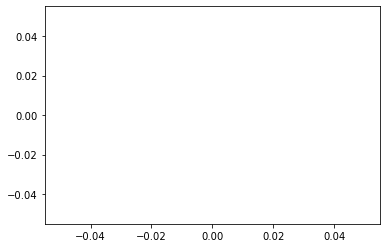

In [177]:
#Part 4: Exploratory Data Analysis

#group the number of either people who died or were hospitalized by
# the vaccine by the manufacturer
vax_manu = df_died.groupby('VAX_MANU')['VAERS_ID'].count()
vax_manu.sort_values(ascending=False)


We can see from the output of the data analysis on the field
"VAX_MANU" that the most administered vaccines that had adverse events to the point of dealth or hospitilization were vaccines manufactured by Pfizer. Though this is also reasonable as we know they have administered the highest number of vaccines in the United States, but about half of the Vaccines.
Accroding to the CDC 44.1 million were manufactured by Moderna
and 45.9 million were manufactured by Pfizer-BioNTech
and 120 thousand were manufactured by an unknown source
https://covid.cdc.gov/covid-data-tracker/#vaccinations

If you are taking the vaccine this is a very strong statistic that should prevent you from choosing Pfizer.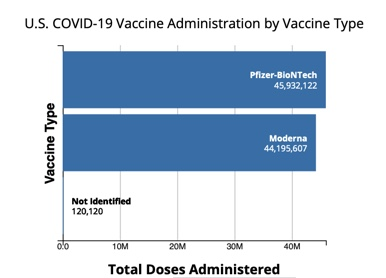

In [64]:
#group the number of either people who died or were hospitalized by
# the vaccine by the state in which they recieved the vaccine
state = df_died.groupby('STATE')['VAERS_ID'].count()
state.sort_values(ascending=False)


STATE
CA    92
FL    59
KY    49
OH    48
IL    40
MI    38
NY    36
TX    34
GA    27
MO    25
MN    25
NC    25
PA    25
WI    22
AR    21
VA    17
MD    16
IA    16
MA    16
KS    16
IN    16
LA    14
NH    14
CO    14
AZ    14
NE    13
TN    13
WA    12
AL    10
AK    10
HI     9
NJ     9
SD     9
ND     8
WV     7
NV     7
CT     7
NM     7
OK     6
WY     5
MT     5
SC     5
UT     5
OR     4
GU     3
DC     3
RI     3
MS     3
ME     2
ID     1
DE     1
PR     1
VT     1
Name: VAERS_ID, dtype: int64

It appears that mostly people with poor reations live in Califorina or Florida, but we also know that there is a correlation between these adverse events and the number of people vaccinated in a state.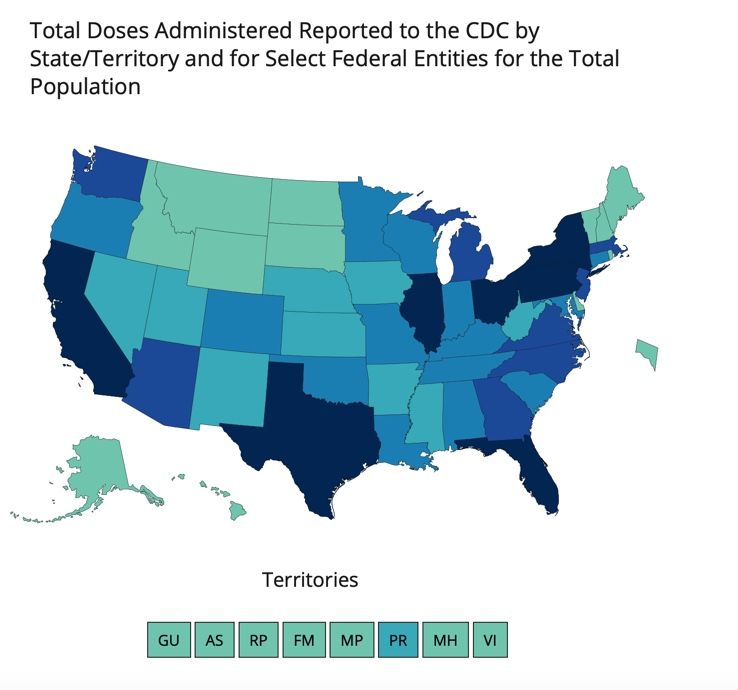
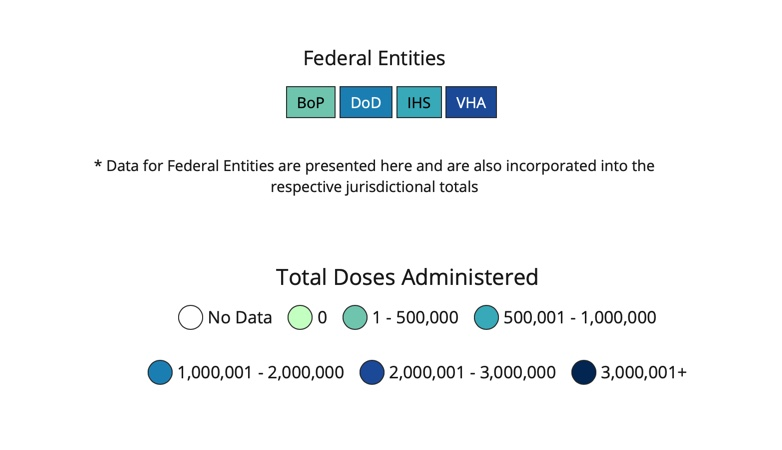

In [106]:
#What is the mean, max, and min ages where people died or were hospitalized by
# the vaccine

avg_age = df_died['AGE_YRS'].mean()
max_age = df_died['AGE_YRS'].max()
min_age = df_died['AGE_YRS'].min()
median_age = df_died['AGE_YRS'].median()
std_age = df_died['AGE_YRS'].std()
print('The average age died is ' + str(avg_age))
print('The maximum age died is ' + str(max_age))
print('The minimum age died is ' + str(min_age))
print('The median age died is ' + str(median_age))
print('The standard deviation for age died is ' + str(std_age))

The average age died is 76.95072186836518
The maximum age died is 105.0
The minimum age died is 0.17
The median age died is 80.0
The standard deviation for age died is 15.239639065303775


We can see from this analysis that there is clearly some data quality issues as we know that no one with an age of .17 recieved the vaccine and this may have some impact on our other anlysis with this data field. Additionally the median age with any impact is a person in their 80s. 

This also needs to be thoroughly understood since most people who recieved the vaccine are in their 80s.  The pot below visually show the heavy concentration of people in older ages having adverse reaction to the vaccine. 

<AxesSubplot:ylabel='Frequency'>

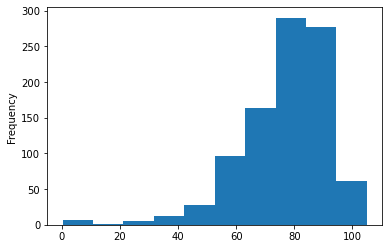

In [153]:
# plof the people who have mostly died or were hospitalized and reiceved the vaccine
df_died['AGE_YRS'].plot(kind = 'hist')

In [115]:
#group the number of either people who died or were hospitalized by
# the vaccine by their age and in the bins that have the most appropriate 
#concentrations of the data 

pd.qcut(df_died['AGE_YRS'], 5).value_counts()


(0.169, 66.0]    202
(89.0, 105.0]    188
(76.0, 83.0]     188
(66.0, 76.0]     186
(83.0, 89.0]     178
Name: AGE_YRS, dtype: int64

We can see more quantitatively that most the concentrated age intervals is 
between 66-105 as it amassed for almost 4/5th of the data 

In [116]:
#group the number of either people who died or were hospitalized by
# the vaccine by their days in the hospital and in the bins that have the most appropriate 
#concentrations of the data 

pd.qcut(df_died['HOSPDAYS'], 5).value_counts()

(0.999, 2.0]    42
(8.0, 24.0]     22
(5.0, 8.0]      21
(3.0, 5.0]      16
(2.0, 3.0]      13
Name: HOSPDAYS, dtype: int64

In [73]:
sex = df_died.groupby('SEX')['VAERS_ID'].count()
sex.sort_values(ascending=False)

SEX
M    555
F    431
U     21
Name: VAERS_ID, dtype: int64

In [74]:
l_threat = df_died.groupby('L_THREAT')['VAERS_ID'].count()
l_threat.sort_values(ascending=False)

L_THREAT
Y    25
Name: VAERS_ID, dtype: int64

In [78]:
er_visit = df_died.groupby('ER_VISIT')['VAERS_ID'].count()
er_visit.sort_values(ascending=False)

Series([], Name: VAERS_ID, dtype: int64)

In [79]:
hospital = df_died.groupby('HOSPITAL')['VAERS_ID'].count()
hospital.sort_values(ascending=False)

HOSPITAL
Y    157
Name: VAERS_ID, dtype: int64

In [81]:
allergies = df_died.groupby('ALLERGIES')['VAERS_ID'].count()
allergies.sort_values(ascending=False)

ALLERGIES
NKA                                63
None                               58
none                               48
NKDA                               40
No known allergies                 26
                                   ..
Shellfish                           1
Shellfish, other                    1
Shellfish/Seafood                   1
Simvastatin                         1
No per screening form completed     1
Name: VAERS_ID, Length: 338, dtype: int64

In [107]:
pd.qcut(df_died['AGE_YRS'], q=4)


RECVDATE
2021-01-01     (69.0, 80.0]
2021-01-01     (80.0, 88.0]
2021-01-03    (88.0, 105.0]
2021-01-03     (69.0, 80.0]
2021-01-04    (0.169, 69.0]
                  ...      
2020-12-30    (88.0, 105.0]
2020-12-31     (80.0, 88.0]
2020-12-31     (80.0, 88.0]
2020-12-31    (88.0, 105.0]
2020-12-31    (88.0, 105.0]
Name: AGE_YRS, Length: 1007, dtype: category
Categories (4, interval[float64]): [(0.169, 69.0] < (69.0, 80.0] < (80.0, 88.0] < (88.0, 105.0]]

In [133]:
time_series = pd.DataFrame(df_died['DATEDIED'].value_counts().reset_index())
time_series.columns = ['DATEDIED', 'count']
time_series

,DATEDIED,count
0,2/1/21,33
1,1/25/21,30
2,1/20/21,28
3,1/15/21,27
4,1/16/21,26
...,...,...
72,12/10/20,1
73,12/22/20,1
74,10/18/20,1
75,10/27/20,1


<AxesSubplot:xlabel='RECVDATE'>

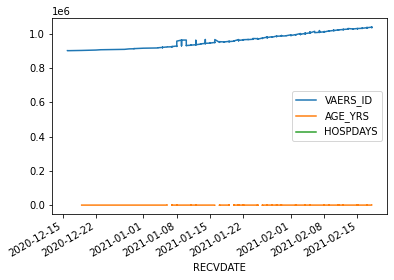

In [157]:
df_died.plot()



1.1456200227531285e-05 %


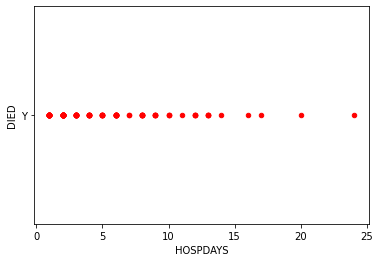

In [172]:
#The number of deaths after recieving the COVID19 vaccines
total_died = df_died['DIED'].count()
percent_died = total_died / 87900000
print(str(percent_died) + " %")

df_died.plot(kind='scatter',x = 'HOSPDAYS',y= 'DIED' ,color='red')
plt.show()



In [151]:
#The number of hospitilizations after recieving the COVID19 vaccines
total_hospital = df_died['HOSPITAL'].count()
percent_hospital = total_hospital / 87900000
print(str(percent_hospital) + ' %')

1.7861205915813424e-06 %
